In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

<h1>ITEM</h1>

In [41]:
# Starting dataset
df = pd.read_csv('D:/Desktop/DataMining/Item.csv', sep=',', index_col=0)
df

,StockCode,Price09,Price10,Price11,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
0,10002,0.991667,1.001439,1.019459,152,2597,314,8.270701,72.138889,8
1,10002R,5.170000,5.060000,NaN,1,4,3,1.333333,0.111111,6
2,10080,0.850000,0.850000,0.393182,24,289,27,10.703704,8.027778,8
3,10109,0.420000,NaN,NaN,1,4,1,4.000000,0.111111,6
4,10120,0.364000,0.234444,0.210000,42,244,60,4.066667,6.777778,4
...,...,...,...,...,...,...,...,...,...,...
4715,90183c,NaN,NaN,2.900000,1,1,1,1.000000,0.027778,1
4716,90191,NaN,NaN,2.950000,3,17,3,5.666667,0.472222,1
4717,90195A,NaN,NaN,2.950000,3,8,3,2.666667,0.222222,1
4718,90195B,NaN,NaN,2.950000,1,1,1,1.000000,0.027778,1


<h3>Correlation Matrix</h3>

<p>We begin by examining the correlations between the attributes of the dataset to be clustered in order to identify the highly correlated couples.
Dropping redundant attributes benefits the analysis by reducing the dimensionality of the dataset and rising the influence that more useful feature could have on the whole clustering process</p>

In [6]:
abb=df.drop(['Price09','Price10','Price11', 'Unnamed: 0'], axis = 1)
df=abb
df

,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
StockCode,,,,,,
10002,152,2597,314,8.270701,72.138889,8
10002R,1,4,3,1.333333,0.111111,6
10080,24,289,27,10.703704,8.027778,8
10109,1,4,1,4.000000,0.111111,6
10120,42,244,60,4.066667,6.777778,4
...,...,...,...,...,...,...
90183c,1,1,1,1.000000,0.027778,1
90191,3,17,3,5.666667,0.472222,1
90195A,3,8,3,2.666667,0.222222,1


In [7]:
mat = df.corr()

In [8]:
df=abb
df

,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
StockCode,,,,,,
10002,152,2597,314,8.270701,72.138889,8
10002R,1,4,3,1.333333,0.111111,6
10080,24,289,27,10.703704,8.027778,8
10109,1,4,1,4.000000,0.111111,6
10120,42,244,60,4.066667,6.777778,4
...,...,...,...,...,...,...
90183c,1,1,1,1.000000,0.027778,1
90191,3,17,3,5.666667,0.472222,1
90195A,3,8,3,2.666667,0.222222,1


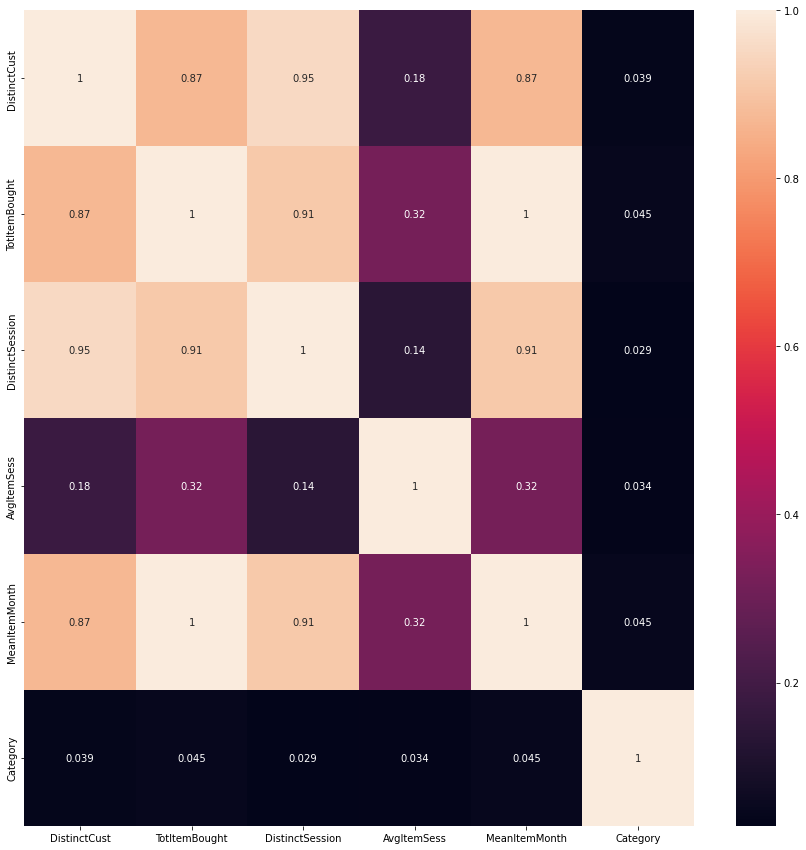

In [9]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(mat, annot=True)
plt.show()

<p>We fix a maximum threshold value in order to identify highly correlated features and subsequently drop them</p>

C:\Users\Sel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


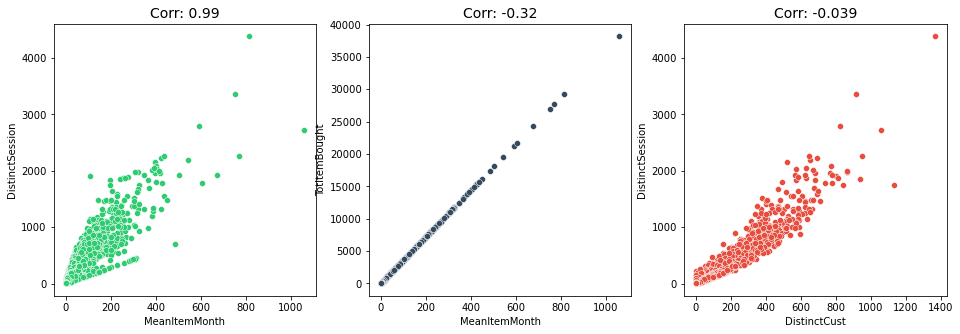

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots( 1, 3, figsize = (16,5) )

sns.scatterplot("MeanItemMonth", "DistinctSession", data = df, ax = ax1, color = "#2ecc71", ).set_title("Corr: 0.99", fontsize = 14)
sns.scatterplot("MeanItemMonth", "TotItemBought", data = df, ax = ax2, color = "#34495e").set_title("Corr: -0.32", fontsize = 14)
sns.scatterplot("DistinctCust", "DistinctSession", data = df, ax = ax3, color = "#e74c3c").set_title("Corr: -0.039", fontsize = 14)
plt.show()

<p>Pairplot mostra le correlazioni e particolari pattern tra tutte le coppie di variabili all'interno del dataset:</p>

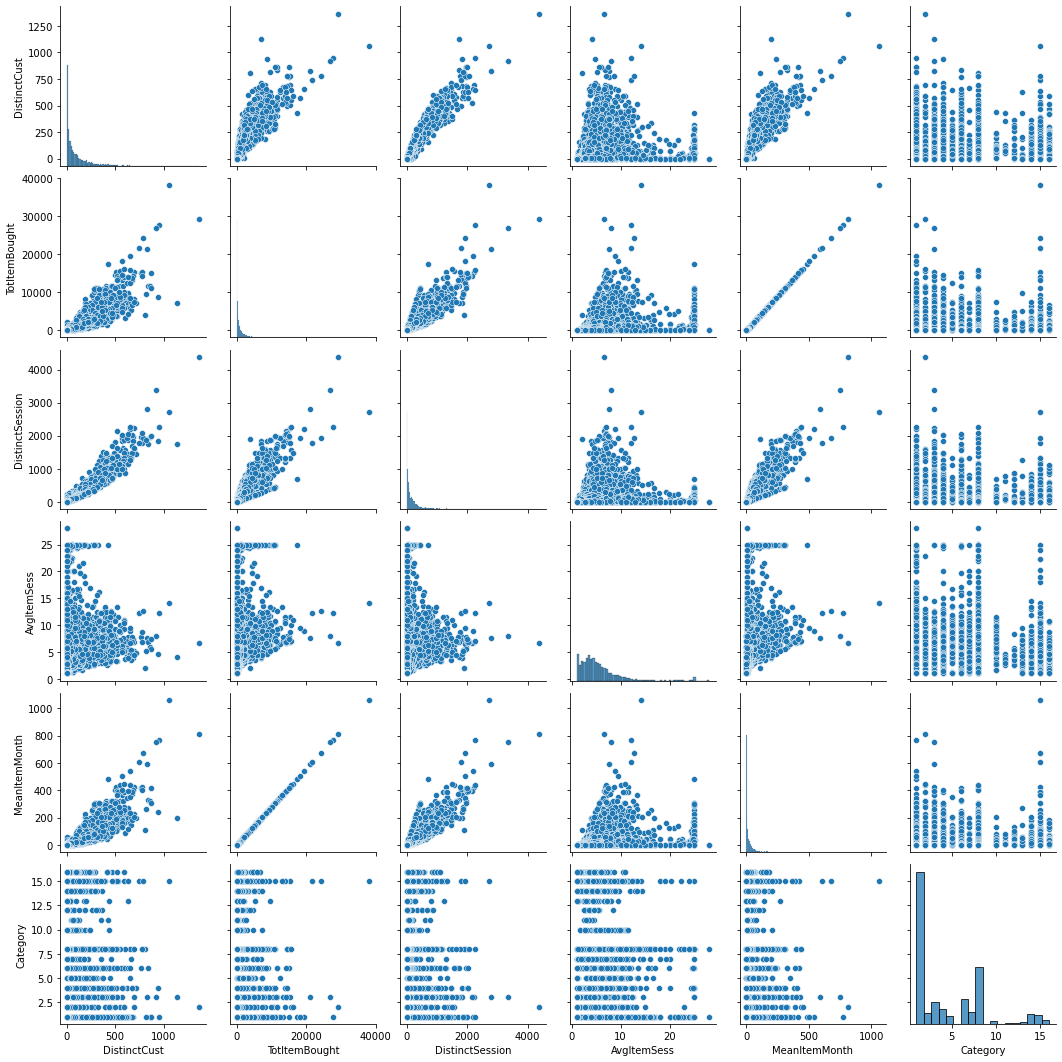

In [12]:
sns.pairplot(df, palette = "Accent")
plt.show()

In [13]:
corr_threshold = 0.9
print("Att. A\tAtt. B\tCorr(A,B)")
for i in range(0, len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = df[df.columns[i]].corr(df[df.columns[j]])
        if  corr > corr_threshold:
            print(df.columns[i] + "\t" + df.columns[j] + "\t" + '{:.4f}'.format(corr))

Att. A	Att. B	Corr(A,B)
DistinctCust	DistinctSession	0.9529
TotItemBought	DistinctSession	0.9093
TotItemBought	MeanItemMonth	1.0000
DistinctSession	MeanItemMonth	0.9093


In [55]:
df.dtypes

Price09            float64
Price10            float64
Price11            float64
DistinctCust         int64
TotItemBought        int64
DistinctSession      int64
AvgItemSess        float64
MeanItemMonth      float64
Category             int64
dtype: object

<p>
Despite the high correlation among the others attributes we decide not to eliminate the attribute due to their relevance within the whole grouping process.</p>

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4720 entries, 10002 to BANK CHARGES
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price09          4720 non-null   float64
 1   Price10          4720 non-null   float64
 2   Price11          4720 non-null   float64
 3   DistinctCust     4720 non-null   int64  
 4   TotItemBought    4720 non-null   int64  
 5   DistinctSession  4720 non-null   int64  
 6   AvgItemSess      4720 non-null   float64
 7   MeanItemMonth    4720 non-null   float64
 8   Category         4720 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 368.8+ KB


<h3>Normalization</h3>

<p>Normalization of data to avoid the dominance - bias- of attributes with an higher magnitude with respect to others.</p>

In [14]:
minmax_scaler = MinMaxScaler()
df_norm_minmax = minmax_scaler.fit_transform(df.values)

In [15]:
ndf = pd.DataFrame(df_norm_minmax, columns=df.columns)
ndf

,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
0,0.110704,0.068001,0.071396,0.269285,0.068001,0.466667
1,0.000000,0.000079,0.000456,0.012346,0.000079,0.333333
2,0.016862,0.007544,0.005931,0.359396,0.007544,0.466667
3,0.000000,0.000079,0.000000,0.111111,0.000079,0.333333
4,0.030059,0.006365,0.013458,0.113580,0.006365,0.200000
...,...,...,...,...,...,...
4715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4716,0.001466,0.000419,0.000456,0.172840,0.000419,0.000000
4717,0.001466,0.000183,0.000456,0.061728,0.000183,0.000000
4718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<h2>K-MEANS</h2>

<p>Run K-Means for values of K in range 2-12 in order to find the best value.
    
The analysis to determine the number of cluster is based on average silhouette coeffincent indicator.
</p>

In [63]:
sil_list = list()
max_k = 15
for k in range(2, max_k):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(ndf)
    
    sil_list.append(silhouette_score(ndf, kmeans_iter.labels_))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
df = df.fillna(0)

No handles with labels found to put in legend.


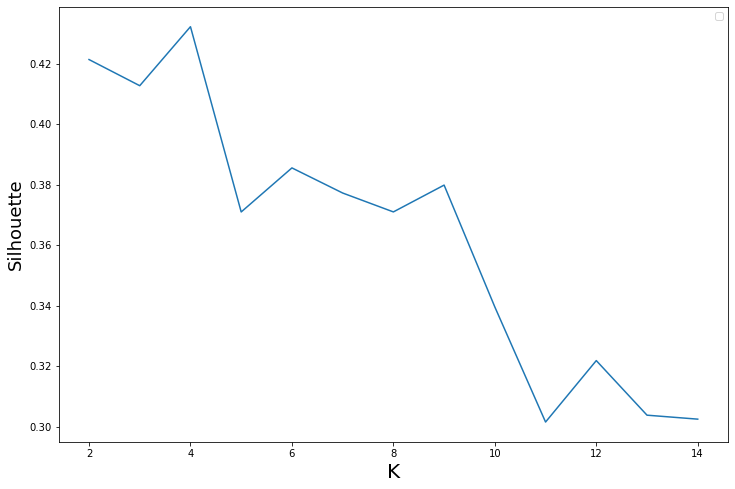

In [60]:
# plot indicators
plt.figure(figsize=(12, 8))
plt.plot(range(2, len(sil_list) + 2), sil_list)
plt.xlabel('K', fontsize=20)
plt.ylabel('Silhouette', fontsize=18)
plt.legend()
plt.show()

<p>With the elbow rule and looking at the graphs we see that the best value of K is 4</p>

In [41]:
labels = []
centers=[]
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(ndf)
centers.append(minmax_scaler.inverse_transform(kmeans.cluster_centers_)) # we store the coordinates of the centroids
labels.append(kmeans.labels_) # we store the labels associated with the records
print("SILHOUETTE:",sil_list[k-2])

SILHOUETTE: 0.43221799228639496


In [42]:
cluster_col = 'K_' + str(k) # it contains the name of the column containing the optimal labels
l = np.transpose(labels)
df[cluster_col] = l

In [72]:
df

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem,MaxItem,MinItem,avgItemSession,MaxSessionsMonth,MeanTimeGap,K_4
Customer ID,,,,,,,,,,,,,
12346.0,26,3.800,5,19.00,4.50,1.00,2,10,1,5.2,12,1.0,1
12358.0,91,35.890,1,35.89,35.89,35.89,9,91,91,91.0,8,0.0,1
12359.0,194,48.570,2,97.14,96.29,0.85,28,182,12,97.0,12,218.0,2
12417.0,149,23.575,2,47.15,46.30,0.85,17,139,10,74.5,10,122.0,2
12422.0,60,6.650,1,6.65,6.65,6.65,5,60,60,60.0,12,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18268.0,142,37.170,1,37.17,37.17,37.17,12,142,142,142.0,11,0.0,1
18271.0,44,26.550,1,26.55,26.55,26.55,8,44,44,44.0,8,0.0,1
18275.0,128,20.650,1,20.65,20.65,20.65,7,128,128,128.0,8,0.0,1


In [81]:
clust_list = list()
for i in range(len(df['K_4'].unique())):
    clust_list.append(df[df['K_4'] == i])

<BarContainer object of 4 artists>

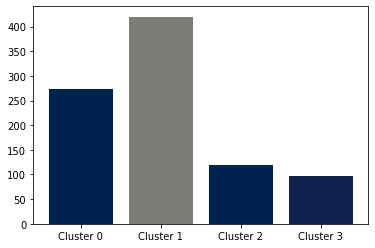

In [102]:
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], [len(clust_list[0]), len(clust_list[1]),len(clust_list[2]),len(clust_list[3])], color=['#00224e','#7d7c78','#01224e','#11224e'])

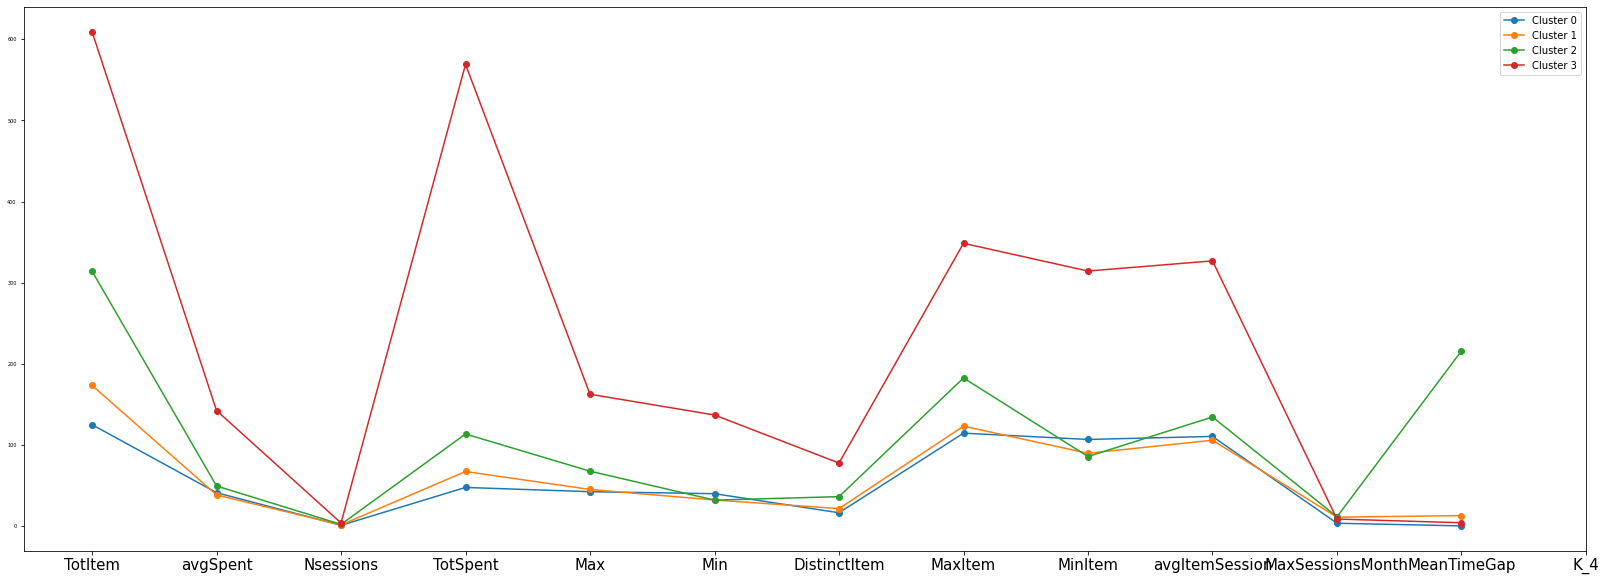

In [56]:
plt.figure(figsize=(28, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=15)
plt.legend(fontsize=10)
plt.show()

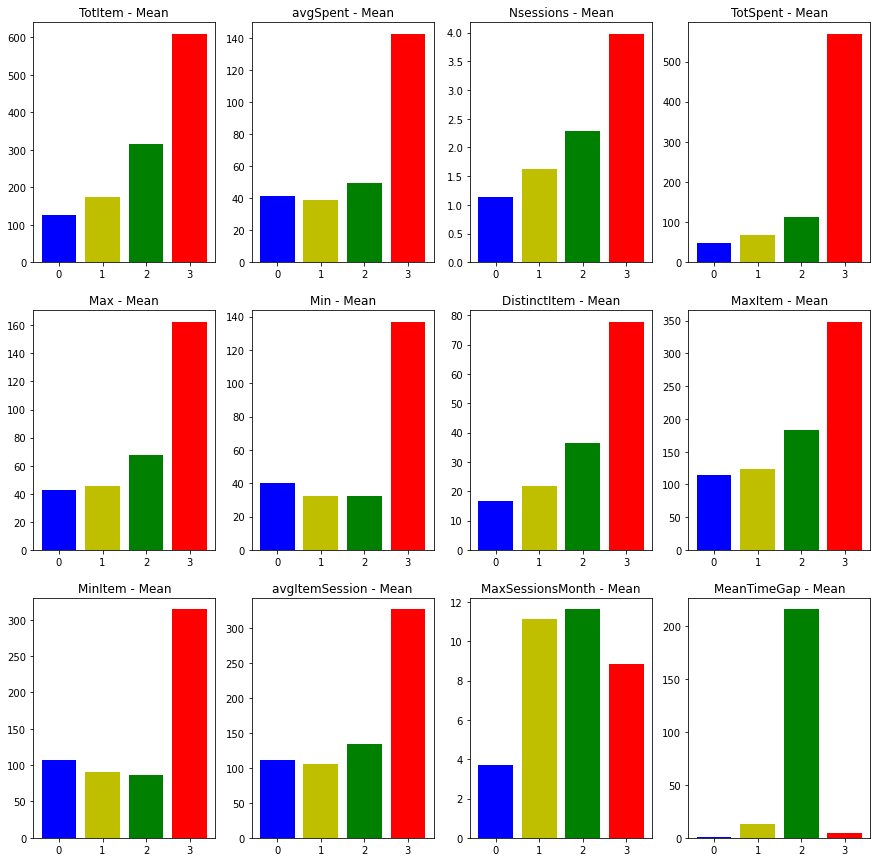

In [105]:
attr = df.columns[:-1]
num_elements = 4
clusters = range(len(clust_list))
fig, axs = plt.subplots(math.ceil(len(attr) / num_elements),num_elements,figsize=(15,15))
for attr_index in range(len(attr)):
    mean_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
    axs[int(attr_index / num_elements)][attr_index % num_elements].bar(clusters, mean_values, color = ['b','y','g','r'])
    axs[int(attr_index / num_elements)][attr_index % num_elements].set_title(f"{attr[attr_index]} - Mean")

<h2>Dimensionality Reduction using PCA</h2>

In [16]:
item=df
item
#Item with no Nan

,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
StockCode,,,,,,
10002,152,2597,314,8.270701,72.138889,8
10002R,1,4,3,1.333333,0.111111,6
10080,24,289,27,10.703704,8.027778,8
10109,1,4,1,4.000000,0.111111,6
10120,42,244,60,4.066667,6.777778,4
...,...,...,...,...,...,...
90183c,1,1,1,1.000000,0.027778,1
90191,3,17,3,5.666667,0.472222,1
90195A,3,8,3,2.666667,0.222222,1


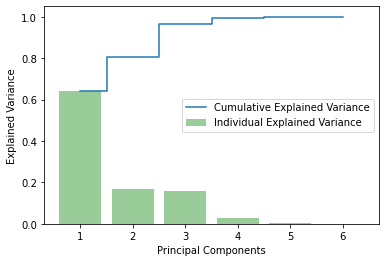

In [17]:
scaler = StandardScaler()
std_item = scaler.fit_transform(item)

pca = PCA()
pca.fit(std_item)

plt.step(range(1, item.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, item.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');


In [18]:
pca = PCA(n_components=2)
pca_item = pca.fit_transform(std_item)

<h2>Variables standardization</h2>


<p>xstd = è il vettore standardizzato
x = è il vettore da standardizzare
μ = è la media della variabile
σ = è la deviazione standard della stessa variabile </p>

In [19]:
scaler = StandardScaler()
std_item = scaler.fit_transform(item)
scaled_item = pd.DataFrame( std_item, columns = item.columns )

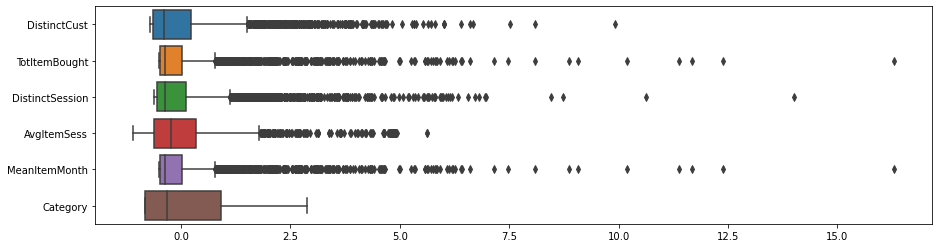

In [20]:
#show standardizzate variables
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_item, orient = "h")
plt.show()

In [21]:
scaled_item.describe()

,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
count,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03
mean,4.190621e-16,-4.427720e-16,-1.559487e-16,1.466812e-16,-3.886251e-16,1.692384e-15
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-7.108083e-01,-5.079433e-01,-6.098664e-01,-1.092125e+00,-5.079433e-01,-8.165036e-01
25%,-6.407295e-01,-4.807649e-01,-5.564966e-01,-6.270544e-01,-4.807649e-01,-8.165036e-01
50%,-3.993470e-01,-3.644591e-01,-3.697024e-01,-2.239284e-01,-3.644591e-01,-3.249664e-01
75%,2.235758e-01,2.297023e-02,1.106257e-01,3.406259e-01,2.297023e-02,9.038764e-01
max,9.910025e+00,1.629467e+01,1.401345e+01,5.626762e+00,1.629467e+01,2.870025e+00


<h1>DBSCAN</h1>

In [22]:
import numpy as np # For data management
import pandas as pd # For data management

import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

from sklearn import datasets # To import the sample dataset
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

In [23]:
df.shape

(4720, 6)

In [24]:
#vedo quanti elementi vuoti abbiamo
df.isnull().sum()

DistinctCust       0
TotItemBought      0
DistinctSession    0
AvgItemSess        0
MeanItemMonth      0
Category           0
dtype: int64

In [13]:
#associo il valore 0 ai Price 09-10-11 mancanti
df = df.fillna(0)
df

,Price09,Price10,Price11,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
StockCode,,,,,,,,,
10002,0.991667,1.001439,1.019459,152,2597,314,8.270701,72.138889,8
10002R,5.170000,5.060000,0.000000,1,4,3,1.333333,0.111111,6
10080,0.850000,0.850000,0.393182,24,289,27,10.703704,8.027778,8
10109,0.420000,0.000000,0.000000,1,4,1,4.000000,0.111111,6
10120,0.364000,0.234444,0.210000,42,244,60,4.066667,6.777778,4
...,...,...,...,...,...,...,...,...,...
90183c,0.000000,0.000000,2.900000,1,1,1,1.000000,0.027778,1
90191,0.000000,0.000000,2.950000,3,17,3,5.666667,0.472222,1
90195A,0.000000,0.000000,2.950000,3,8,3,2.666667,0.222222,1


In [14]:
#controllo che non ci siano elementi vuoti
df.isnull().sum()

Price09            0
Price10            0
Price11            0
DistinctCust       0
TotItemBought      0
DistinctSession    0
AvgItemSess        0
MeanItemMonth      0
Category           0
dtype: int64

<h3>Fitting</h3>

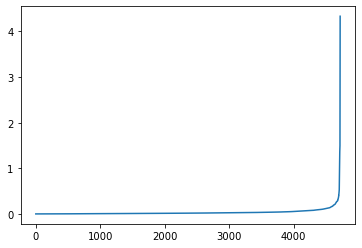

In [25]:
knn = NearestNeighbors(n_neighbors=20)
nbrs = knn.fit(pca_item)
distances, indices = nbrs.kneighbors(pca_item)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances);

plt.savefig('D:/Desktop/DataMining/Item_dbscan_knn_dist.png')

In [26]:
#scelgo i valori di eps e Min
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


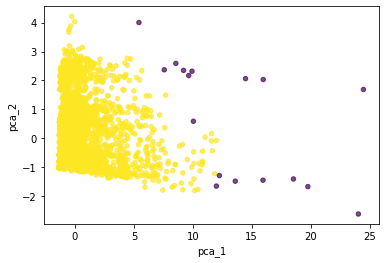

In [35]:
dbscan = DBSCAN(eps=1.4, min_samples=20)
clus_item = dbscan.fit_predict(pca_item)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.scatter(*pca_item.T, c=clus_item, s=20, alpha=0.7);

plt.savefig('D:/Desktop/DataMining/Item_clustering_dbsan.png')

In [36]:
pd.DataFrame(pd.Series(clus_item).value_counts(), columns=['ItemsNb']).T.sort_index(axis=1)

,-1,0
ItemsNb,17,4703


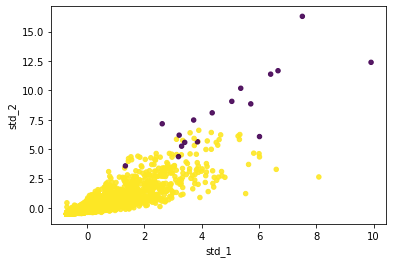

In [38]:
#DBSCAN without pca
plt.xlabel('std_1')
plt.ylabel('std_2')
plt.scatter(std_item[:, 0], std_item[:, 1], c=clus_item, s=20, alpha=0.9);

In [39]:
item_dbscan = item.copy(deep=True)
item_dbscan['cluster'] = clus_item
item_dbscan['cluster'] = item_dbscan['cluster']
item_dbscan

,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category,cluster
StockCode,,,,,,,
10002,152,2597,314,8.270701,72.138889,8,0
10002R,1,4,3,1.333333,0.111111,6,0
10080,24,289,27,10.703704,8.027778,8,0
10109,1,4,1,4.000000,0.111111,6,0
10120,42,244,60,4.066667,6.777778,4,0
...,...,...,...,...,...,...,...
90183c,1,1,1,1.000000,0.027778,1,0
90191,3,17,3,5.666667,0.472222,1,0
90195A,3,8,3,2.666667,0.222222,1,0


In [40]:
pd.DataFrame(pd.Series(clus_item).value_counts(), columns=['ItemsNb']).T.sort_index(axis=1)

,-1,0
ItemsNb,17,4703


In [29]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(item)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)
    


In [30]:
#INZIALIZZAZIONE DEI DATAFRAME CHE CONTERRANNO I RISULTATI DEL GRID SEARCH
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)


In [33]:
#grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_item, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 0.204   14
  2 | Tested with eps = 0.1 and min_samples =  10 | 0.202    6
  3 | Tested with eps = 0.1 and min_samples =  15 | 0.201    3
  4 | Tested with eps = 0.1 and min_samples =  20 |   0.2    2
  5 | Tested with eps = 0.1 and min_samples =  25 |   0.2    2
  6 | Tested with eps = 0.1 and min_samples =  30 | 0.199    1
  7 | Tested with eps = 0.1 and min_samples =  35 | 0.199    1
  8 | Tested with eps = 0.1 and min_samples =  40 | 0.199    1
  9 | Tested with eps = 0.1 and min_samples =  45 | 0.199    1
 10 | Tested with eps = 0.2 and min_samples =   5 | 0.204   14
 11 | Tested with eps = 0.2 and min_samples =  10 | 0.202    6
 12 | Tested with eps = 0.2 and min_samples =  15 | 0.201    3
 13 | Tested with eps = 0.2 and min_samples =  20 |   0.2    2
 14 | Tested with eps = 0.2 and min_samples =  25

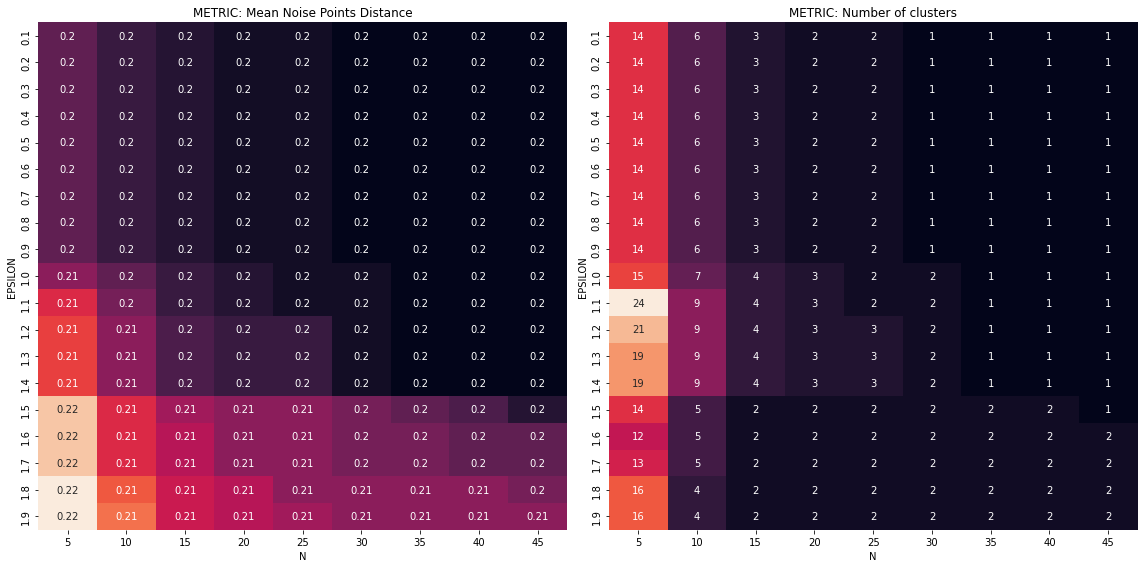

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [44]:
#provo senza PRICE 09-10-11
import pandas as pd

df.drop(df.columns[[0,1,2]],
        axis = 1,
        inplace = True)

              DistinctCust  TotItemBought  DistinctSession  AvgItemSess  \
StockCode                                                                 
10002                  152           2597              314     8.270701   
10002R                   1              4                3     1.333333   
10080                   24            289               27    10.703704   
10109                    1              4                1     4.000000   
10120                   42            244               60     4.066667   
...                    ...            ...              ...          ...   
90183c                   1              1                1     1.000000   
90191                    3             17                3     5.666667   
90195A                   3              8                3     2.666667   
90195B                   1              1                1     1.000000   
BANK CHARGES             1              1                1     1.000000   

              MeanItemMo

In [45]:
df


,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
StockCode,,,,,,
10002,152,2597,314,8.270701,72.138889,8
10002R,1,4,3,1.333333,0.111111,6
10080,24,289,27,10.703704,8.027778,8
10109,1,4,1,4.000000,0.111111,6
10120,42,244,60,4.066667,6.777778,4
...,...,...,...,...,...,...
90183c,1,1,1,1.000000,0.027778,1
90191,3,17,3,5.666667,0.472222,1
90195A,3,8,3,2.666667,0.222222,1


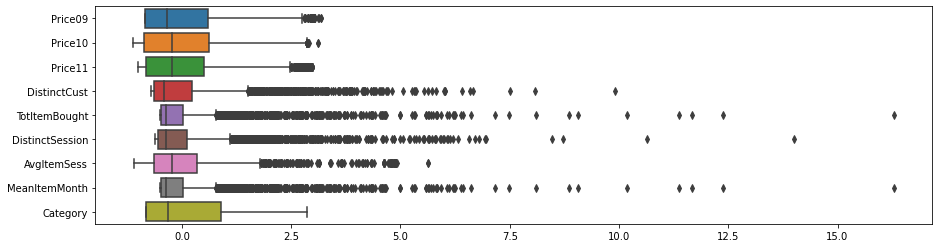

In [46]:
scaler = StandardScaler()
std_item = scaler.fit_transform(item)
scaled_item = pd.DataFrame( std_item, columns = item.columns )
#show standardizzate variables
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_item, orient = "h")
plt.show()


In [47]:
scaled_item.describe()

,Price09,Price10,Price11,DistinctCust,TotItemBought,DistinctSession,AvgItemSess,MeanItemMonth,Category
count,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03,4.720000e+03
mean,1.104620e-14,-1.822271e-15,2.333162e-15,4.190621e-16,-4.427720e-16,-1.559487e-16,1.466812e-16,-3.886251e-16,1.692384e-15
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-8.435864e-01,-1.112717e+00,-1.000026e+00,-7.108083e-01,-5.079433e-01,-6.098664e-01,-1.092125e+00,-5.079433e-01,-8.165036e-01
25%,-8.435864e-01,-8.619950e-01,-8.156379e-01,-6.407295e-01,-4.807649e-01,-5.564966e-01,-6.270544e-01,-4.807649e-01,-8.165036e-01
50%,-3.316130e-01,-2.194788e-01,-2.358073e-01,-3.993470e-01,-3.644591e-01,-3.697024e-01,-2.239284e-01,-3.644591e-01,-3.249664e-01
75%,5.984585e-01,6.270637e-01,5.046713e-01,2.235758e-01,2.297023e-02,1.106257e-01,3.406259e-01,2.297023e-02,9.038764e-01
max,3.174185e+00,3.122529e+00,2.980952e+00,9.910025e+00,1.629467e+01,1.401345e+01,5.626762e+00,1.629467e+01,2.870025e+00
